In [1]:
!wget "https://www.dropbox.com/scl/fo/hlujog78gi4zy8duy683h/AF-i2zym-HVnaEKJe4MhEv4?rlkey=tzdr361wsqcr1oda3vrfmypcf&dl=1" -O dropbox_folder.zip
!unzip dropbox_folder.zip -d extracted_data/

--2025-07-01 19:40:11--  https://www.dropbox.com/scl/fo/hlujog78gi4zy8duy683h/AF-i2zym-HVnaEKJe4MhEv4?rlkey=tzdr361wsqcr1oda3vrfmypcf&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf89a6d490b1ebe2451ddc0db1d.dl.dropboxusercontent.com/zip_download_get/CQGrjvd22ULB_xAq1-i6Ad8Su1KBjEABx7hIDq9zqW8lOetxo1TvGPE2RFhctcXCfwaPWZOh8TbDIkATKHM1jOGe56vmdZnxWe5z6rO7nvkZhA# [following]
--2025-07-01 19:40:12--  https://ucf89a6d490b1ebe2451ddc0db1d.dl.dropboxusercontent.com/zip_download_get/CQGrjvd22ULB_xAq1-i6Ad8Su1KBjEABx7hIDq9zqW8lOetxo1TvGPE2RFhctcXCfwaPWZOh8TbDIkATKHM1jOGe56vmdZnxWe5z6rO7nvkZhA
Resolving ucf89a6d490b1ebe2451ddc0db1d.dl.dropboxusercontent.com (ucf89a6d490b1ebe2451ddc0db1d.dl.dropboxusercontent.com)... 162.125.65.15, 2620:100:6021:15::a27d:410f
Connecting to ucf89a6d490b1ebe2451ddc0db1d

#Data Initialization And Visualization For CDS

##Initialization

In [2]:
import pandas as pd
import pandas as pd

# 1997
child97 = pd.read_csv('/content/extracted_data/RawData/199Child.csv')
child97['year'] = 1997

# 2002
child02 = pd.read_csv('/content/extracted_data/RawData/Child02.csv')
child02['year'] = 2002

# 2007
child07 = pd.read_csv('/content/extracted_data/RawData/Child07.csv')
child07['year'] = 2007

# 2014
child14 = pd.read_csv('/content/extracted_data/RawData/Child14.csv')
child14['year'] = 2014

# 2019
child19 = pd.read_csv('/content/extracted_data/RawData/Child19.csv')
child19['year'] = 2019


In [3]:
#drop children that didnt partipacte due to age
cds_all_Nofilter = pd.concat([child97, child02, child07, child14, child19], ignore_index=True)
cds_all_Nofilter.to_parquet('cds_all_Nofilter.parquet',index=False)
child97 = child97[child97["Q3AP_SS"].notnull()]
child02 = child02[child02["Q24APW"].notnull()]
child07 = child07[child07["Q34APW"].notnull()]
child14 = child14[child14["A14APW"].notnull()]
child19 = child19[child19["A19APW"].notnull()]
cds_all = pd.concat([child97, child02, child07, child14, child19], ignore_index=True)

cds_all.to_parquet('cds_all.parquet', index=False)


##Visualization

Aside from the Applied Problems subtest, which involved real-life scenarios such as calculating change, measuring time, and interpreting everyday numerical information, the Woodcock-Johnson assessment also included several other subtests, such as:

*   Identification

*   Letter-Word Identification

*   Passage Comprehension

*   Calculation

*   Broad Math

****NOTE: The questions themselves are classified****


However, all of these subtests involved a much smaller subset of children and were administered in at most two waves. For example, the math subtests were only conducted in 1997 and 2019, and most of the other subtests also appeared only in those two waves.

An example for the math subtests is shown below:



In addition, all of these assessments were not administered to all children. This is evident when comparing the plots in the All Children section with those in the Applied Problems section across different years. For example, in 2002, approximately 3,000 children were in the sample, but only about 2,500 completed the Applied Problems subtest. The gap becomes more pronounced in 2019, where over 4,000 children were in the dataset, but only around 1,300 were assessed with the Applied Problems subtest. This suggests a declining participation or interest in administering the assessment in later waves.

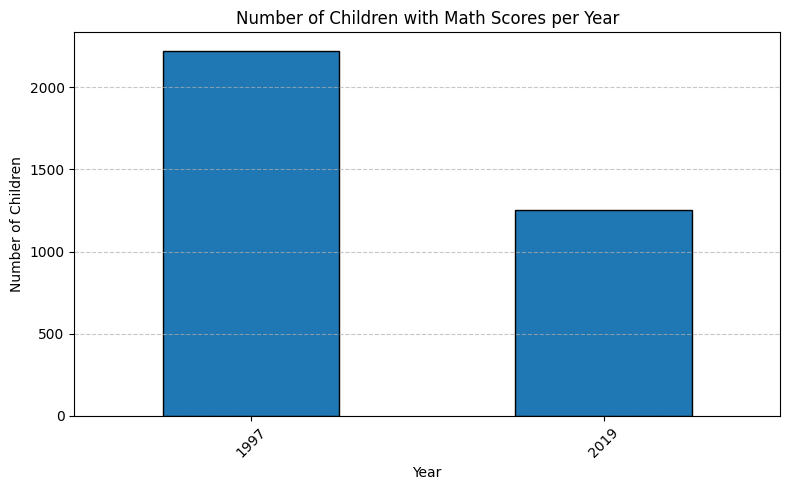

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

year_counts = cds_all_Nofilter[cds_all_Nofilter['Q3BMA_SS'].notnull()|cds_all_Nofilter['A19MRSS'].notnull()]["year"].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
year_counts.sort_index().plot(kind='bar', edgecolor='black')
plt.title("Number of Children with Math Scores per Year")
plt.xlabel("Year")
plt.ylabel("Number of Children")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###CDS all Children data

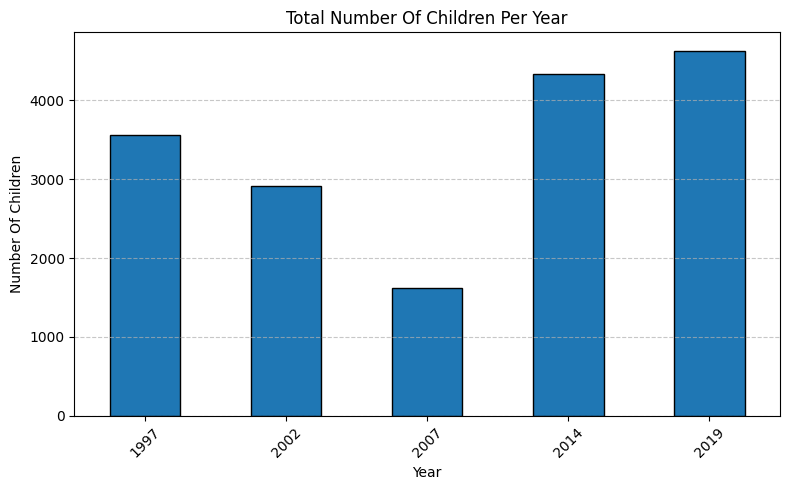

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

year_counts = cds_all_Nofilter["year"].value_counts().sort_index()

plt.figure(figsize=(8,5))
year_counts.sort_index().plot(kind='bar' , edgecolor='black')
plt.title('Total Number Of Children Per Year')
plt.xlabel('Year')
plt.ylabel('Number Of Children')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


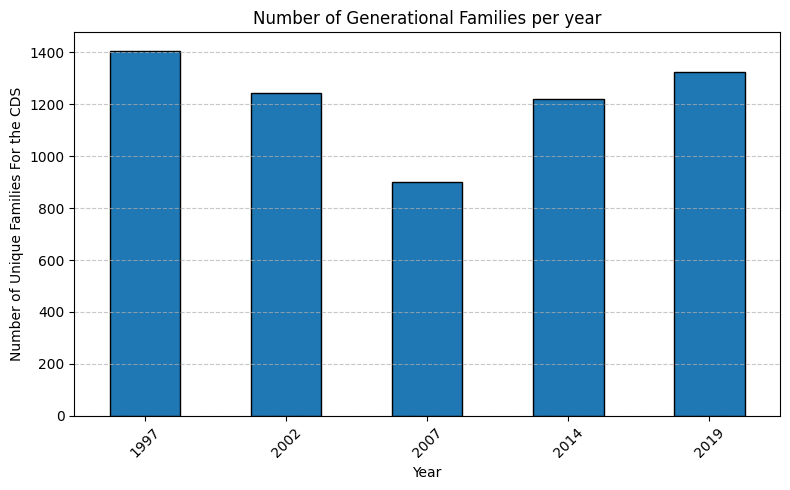

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Count unique families per year (assuming 'ER30001' is the family ID)
family_counts = cds_all_Nofilter.groupby("year")["ER30001"].nunique()

# Plot
plt.figure(figsize=(8, 5))
family_counts.sort_index().plot(kind='bar', edgecolor='black')
plt.title("Number of Generational Families per year")
plt.xlabel("Year")
plt.ylabel("Number of Unique Families For the CDS")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

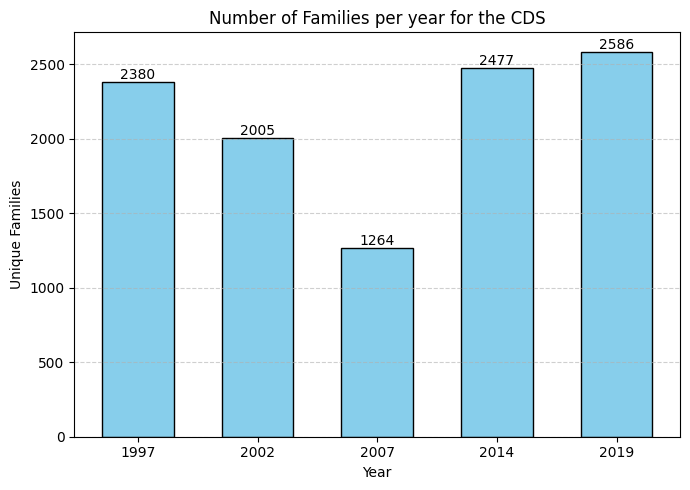

In [6]:
import matplotlib.pyplot as plt

# Number of families per CDS wave — using unique family ID counts
families_by_year = {
    1997: cds_all_Nofilter['ER33401'].nunique(),
    2002: cds_all_Nofilter['ER33601'].nunique(),
    2007: cds_all_Nofilter['ER33901'].nunique(),
    2014: cds_all_Nofilter['ER34201'].nunique(),
    2019: cds_all_Nofilter['ER34701'].nunique()
}



# Use index positions for tighter bars
x = list(range(len(families_by_year)))
heights = list(families_by_year.values())
labels = list(families_by_year.keys())

# Plot
plt.figure(figsize=(7, 5))
bars = plt.bar(x, heights, edgecolor="black", color="skyblue", width=0.6)

# Add labels
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(heights[i]), ha='center', va='bottom', fontsize=10)

# Custom x-axis
plt.xticks(x, labels)
plt.title("Number of Families per year for the CDS")
plt.xlabel("Year")
plt.ylabel("Unique Families")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


###Applied Problems Specific Analysis

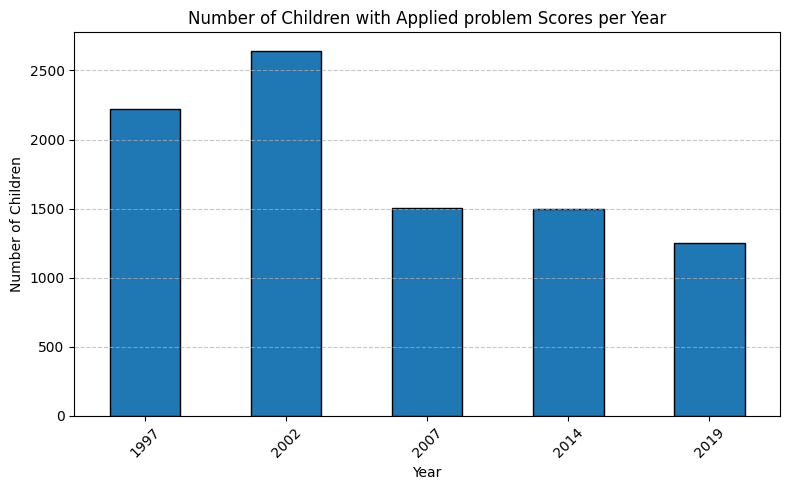

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

year_counts = cds_all["year"].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
year_counts.sort_index().plot(kind='bar', edgecolor='black')
plt.title("Number of Children with Applied Problem Scores per Year")
plt.xlabel("Year")
plt.ylabel("Number of Children")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**The number of children with Applied Problem scores peaked in 2002 and declined in subsequent CDS waves. This trend likely reflects the original 1997 CDS cohort aging out over time, with fewer newly eligible children added in later waves.**

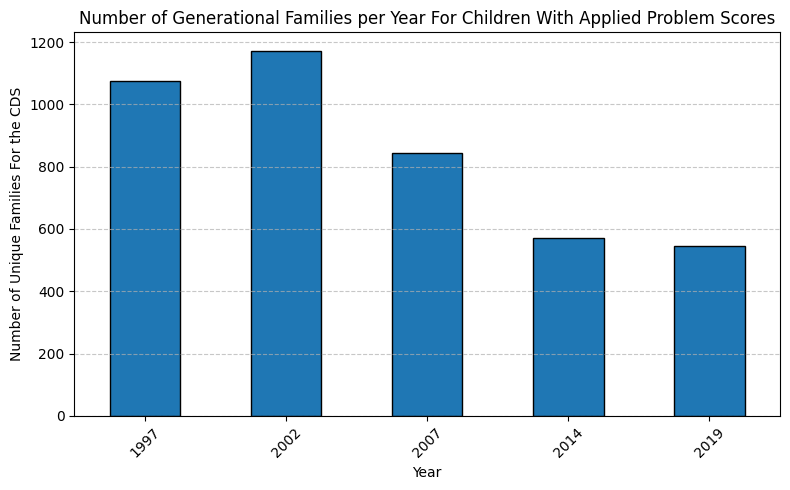

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Count unique families per year (assuming 'ER30001' is the family ID)
family_counts = cds_all.groupby("year")["ER30001"].nunique()

# Plot
plt.figure(figsize=(8, 5))
family_counts.sort_index().plot(kind='bar', edgecolor='black')
plt.title("Number of Generational Families per Year For Children With Applied Problem Scores")
plt.xlabel("Year")
plt.ylabel("Number of Unique Families For the CDS")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**The number of generational families represented in each CDS wave declines after 2002, which is expected as the sample ages and fewer new child participants are recruited. This highlights the importance of cohort design in interpreting trends over time**

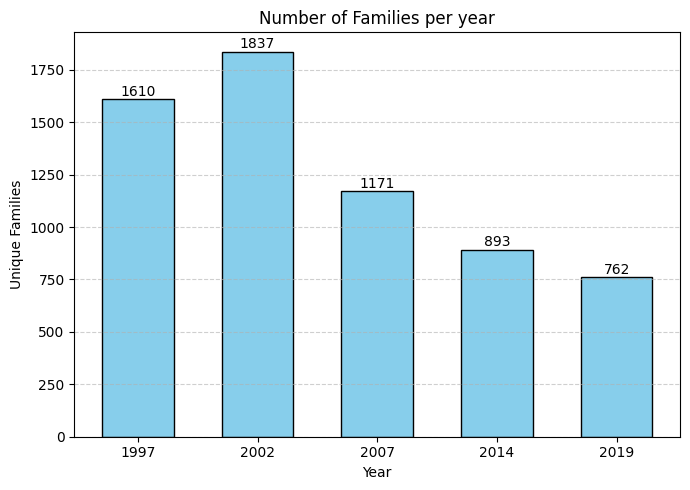

In [ ]:
import matplotlib.pyplot as plt

# Number of families per CDS wave — using unique family ID counts
families_by_year = {
    1997: child97['ER33401'].nunique(),
    2002: child02['ER33601'].nunique(),
    2007: child07['ER33901'].nunique(),
    2014: child14['ER34201'].nunique(),
    2019: child19['ER34701'].nunique()
}



# Use index positions for tighter bars
x = list(range(len(families_by_year)))
heights = list(families_by_year.values())
labels = list(families_by_year.keys())

# Plot
plt.figure(figsize=(7, 5))
bars = plt.bar(x, heights, edgecolor="black", color="skyblue", width=0.6)

# Add labels
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(heights[i]), ha='center', va='bottom', fontsize=10)

# Custom x-axis
plt.xticks(x, labels)
plt.title("Number of Families per year for the CDS")
plt.xlabel("Year")
plt.ylabel("Unique Families")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



**The number of families participating in each CDS wave peaked in 2002 and steadily declined in later years. This pattern reflects the original cohort aging out and limited recruitment of new families in subsequent waves.**

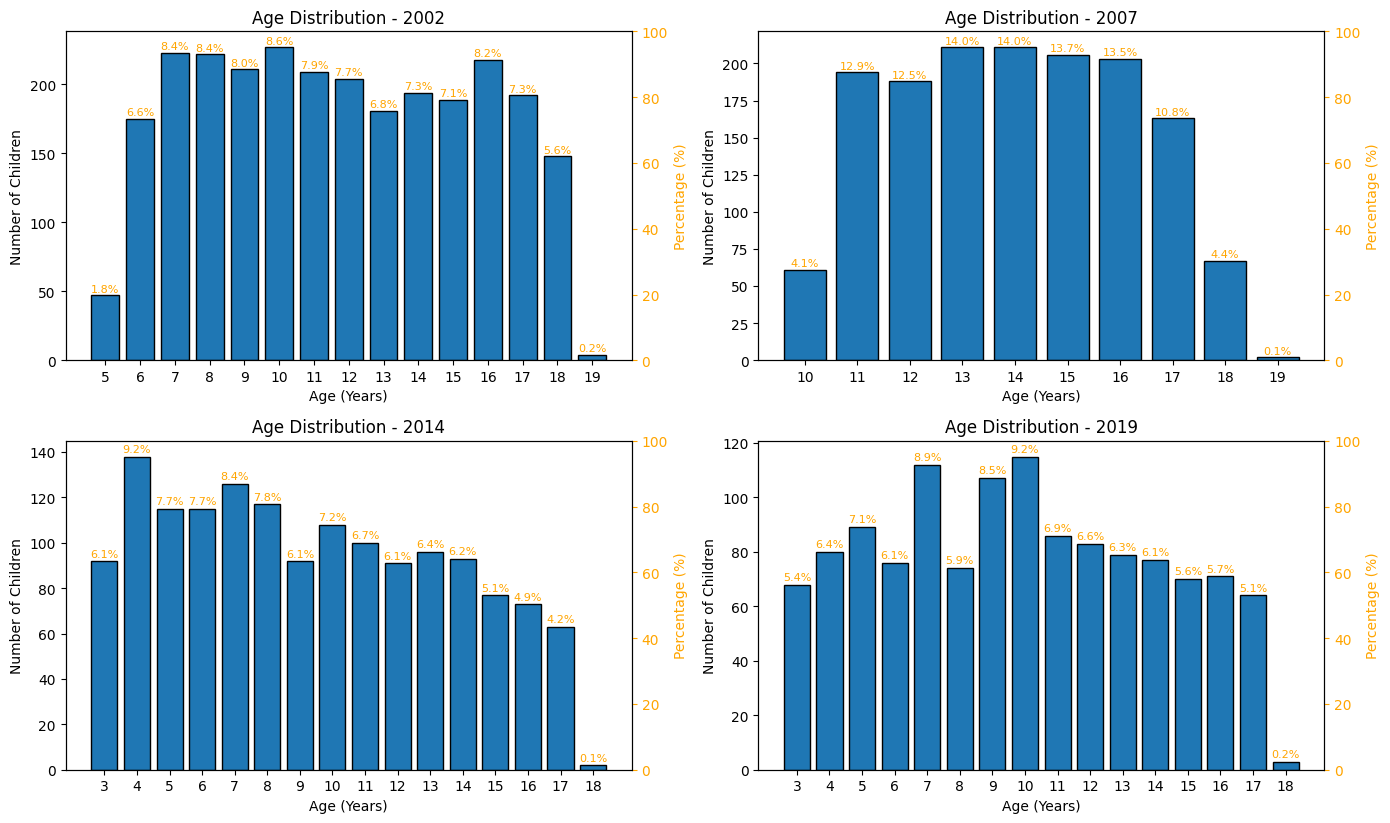

In [ ]:


age_columns = {
    2002: "Q24IWAGE",
    2007: "Q34IWAGE",
    2014: "A14IWAGE",
    2019: "A19IWAGE"
}
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for idx, (year, age_col) in enumerate(age_columns.items()):
    if age_col in cds_all.columns:
        # Convert age from months to integer years
        age_data = pd.to_numeric(cds_all[cds_all["year"] == year][age_col], errors='coerce').dropna()
        age_years = (age_data // 12).astype(int)

        # Count per age
        age_counts = age_years.value_counts().sort_index()
        ages = age_counts.index
        counts = age_counts.values
        total = counts.sum()
        percents = counts / total * 100

        # Left Y-axis: count
        ax1 = axes[idx]
        bars = ax1.bar(ages, counts, edgecolor='black')
        ax1.set_xlabel("Age (Years)")
        ax1.set_ylabel("Number of Children")
        ax1.set_title(f"Age Distribution - {year} for the CDS")
        ax1.set_xticks(ages)

        # Right Y-axis: percent
        ax2 = ax1.twinx()
        ax2.set_ylabel("Percentage (%)", color='orange')
        ax2.set_ylim(0, 100)
        ax2.tick_params(axis='y', colors='orange')

        # Optionally overlay percent as text
        for bar, pct in zip(bars, percents):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2, height + 1, f"{pct:.1f}%",
                     ha='center', va='bottom', fontsize=8, color='orange')

# Remove unused subplot if present
for i in range(len(age_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



**The age distributions across CDS waves reflect the aging of the original 1997 cohort and changes in recruitment. In 2002 and 2007, older children (ages 7–17) dominate the sample, while the 2014 and 2019 waves include more younger children again, indicating a partial refresh of the cohort or inclusion of new children in PSID families.**

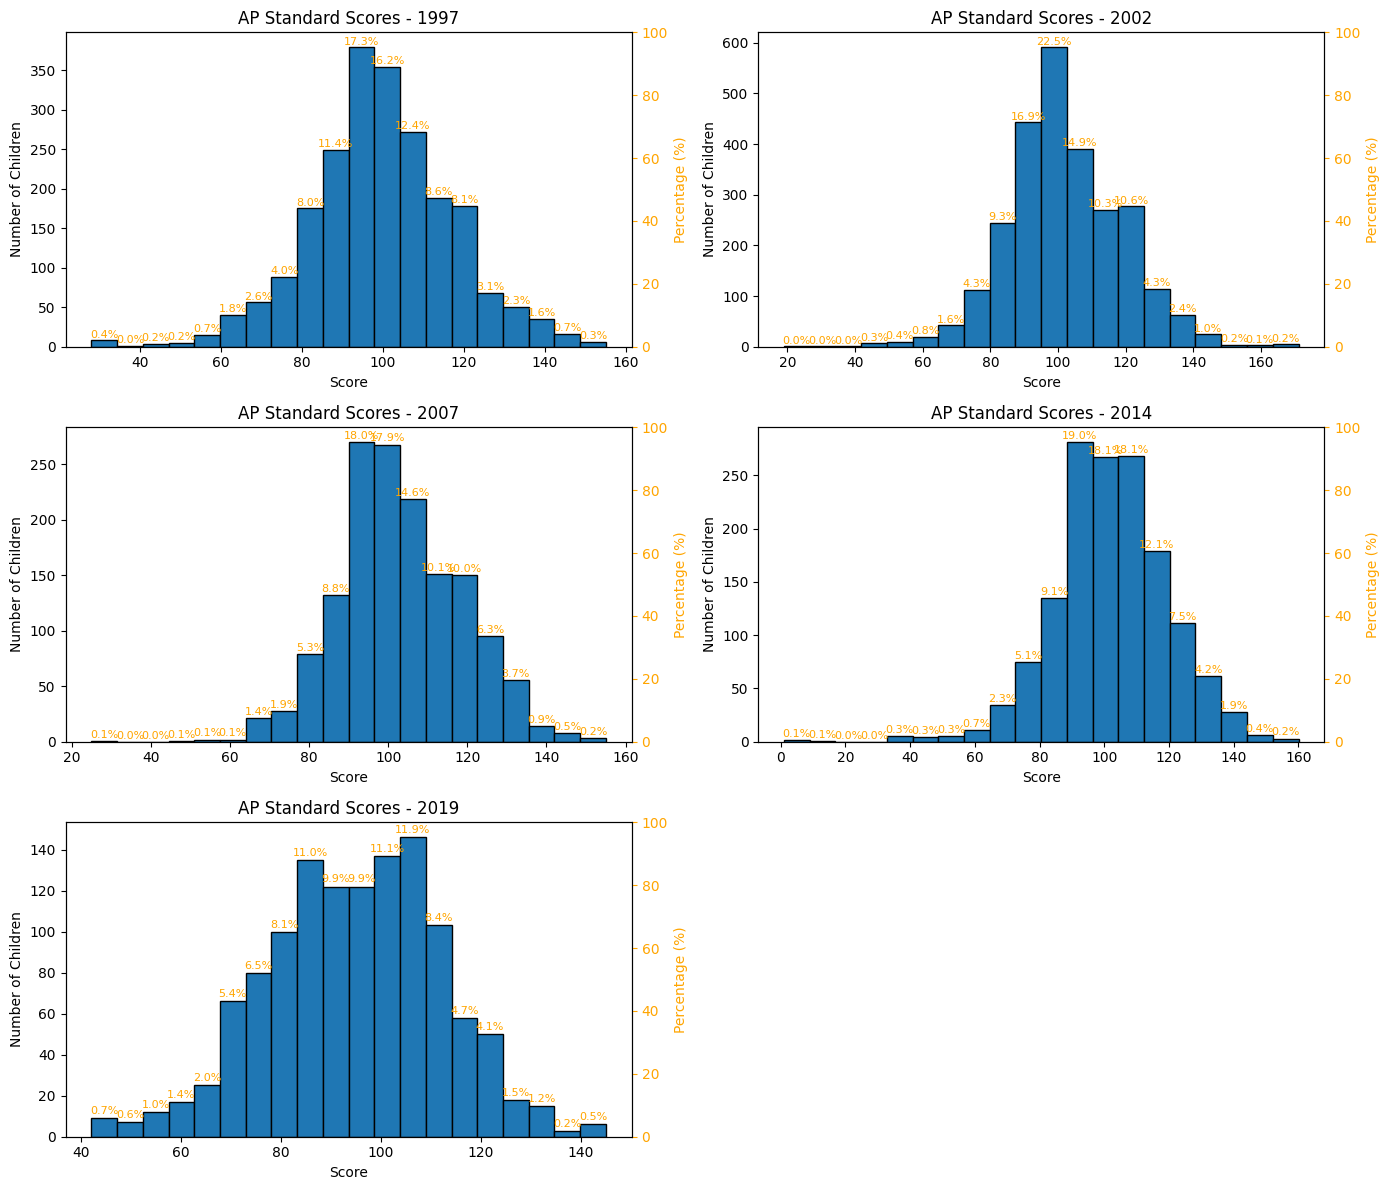

In [ ]:
score_columns = {
    1997: "Q3AP_SS",
    2002: "Q24APSS",
    2007: "Q34APSS",
    2014: "A14APSS",
    2019: "A19APSS"
}



fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for idx, (year, score_col) in enumerate(score_columns.items()):
    if score_col in cds_all.columns:
        # Get scores
        scores = pd.to_numeric(cds_all[cds_all["year"] == year][score_col], errors='coerce').dropna()
        scores= scores[(scores !=999) &(scores !=996) &(scores !=995) &(scores !=0)]

        # Create bins and histogram manually
        counts, bins = pd.cut(scores, bins=20, retbins=True, right=False)
        bin_counts = counts.value_counts().sort_index()
        bin_labels = [f"{int(interval.left)}–{int(interval.right)}" for interval in bin_counts.index]
        bin_centers = [(interval.left + interval.right) / 2 for interval in bin_counts.index]
        total = bin_counts.sum()
        percentages = (bin_counts / total * 100)

        # Plot count bars
        ax = axes[idx]
        bars = ax.bar(bin_centers, bin_counts.values, width=(bins[1] - bins[0]), align='center', edgecolor='black')
        ax.set_title(f"Applied Problems Standard Scores - {year} For The CDS ")
        ax.set_xlabel("Score")
        ax.set_ylabel("Number of Children")

        # Right Y-axis: percentage
        ax2 = ax.twinx()
        ax2.set_ylabel("Percentage (%)", color='orange')
        ax2.set_ylim(0, 100)
        ax2.tick_params(axis='y', colors='orange')

        # Optional: add % labels
        for bar, pct in zip(bars, percentages):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{pct:.1f}%",
                    ha='center', va='bottom', fontsize=8, color='orange')

# Hide unused subplot
for i in range(len(score_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



**These histograms show the distribution of standard scores on the Applied Problem (AP) test across CDS waves from 1997 to 2019. Each wave follows a roughly normal distribution centered around a mean of 100, which is expected given standardized scoring. Over time, the distributions remain consistent, indicating stable test performance across cohorts despite variation in sample size. The slight spread differences reflect natural sampling variation and changes in test-taking groups over the years.**

===============================================================================


In our opinion, the data quality overall supports our research rather than undermining it. The consistently low nonresponse rates across waves and family structures give us confidence that missing data isn’t a major concern. The stability in the distribution of applied problem scores over time also reinforces the reliability of this measure, which is central to our analysis. While the sample size does decline in later waves, that drop is expected due to aging cohorts, and it doesn’t appear to distort the trends we’re interested in. So overall, we believe the structure and consistency of the data work in favor of our research goals.